<a href="https://colab.research.google.com/github/RidwanRizqi/PCVK_Genap_2023/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


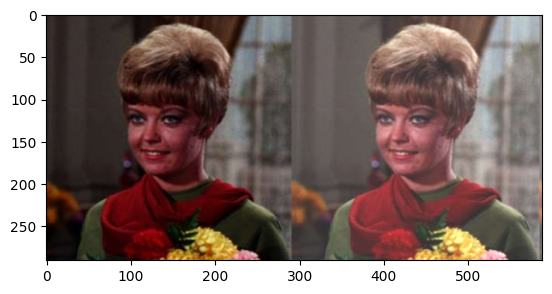

In [11]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('./drive/MyDrive/PCVK/female.jpg')
original = cv.cvtColor(original, cv.COLOR_BGR2RGB)
if original is None:
    print("Error: Unable to read the image. Please check the file path.")
brightness_image = np.zeros(original.shape, original.dtype)

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
# brighness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
plt.imshow(final_frame)
plt.show()

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

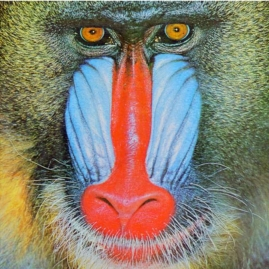

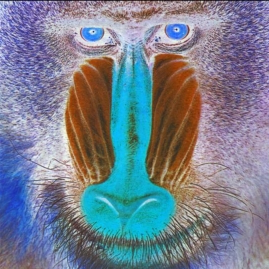

In [12]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

image_path = './drive/MyDrive/PCVK/monyet.jpg'
original_image = cv.imread(image_path)

cv2_imshow(original_image)

inverted_image = 255 - original_image
cv2_imshow(inverted_image)

2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras, sehingga
menghasilkan keluaran seperti berikut:


In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

 Mengubah kontras dan tingkat kecerahan citra 
----------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


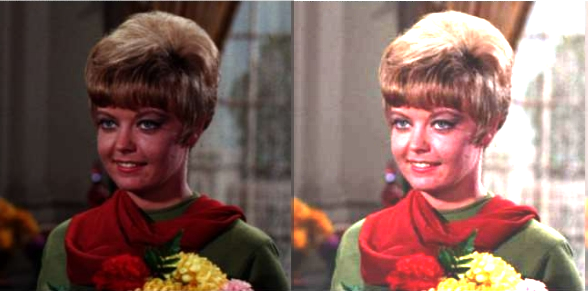

In [32]:
print(' Mengubah kontras dan tingkat kecerahan citra ')
print('----------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = float(input('Masukkan nilai kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('./drive/MyDrive/PCVK/female.jpg')
contrast_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            contrast_image[y,x,c] = np.clip(contrast*original[y,x,c] + brightness, 0, 255)
final_frame = cv.hconcat((original, contrast_image))
cv2_imshow(final_frame)


3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log, sehingga menghasilkan keluaran seperti berikut:


Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------
Masukkan nilai kecerahan: 50


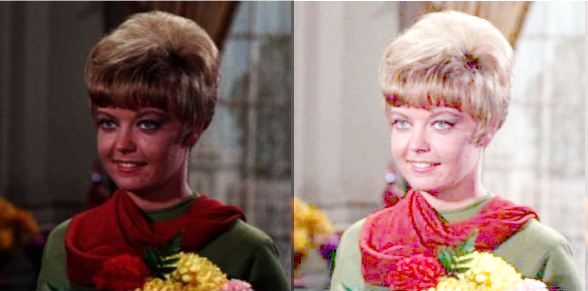

In [34]:
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('./drive/MyDrive/PCVK/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(brightness * (np.log([1 + original[y,x,c]])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)


4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada
bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

a. Averaging

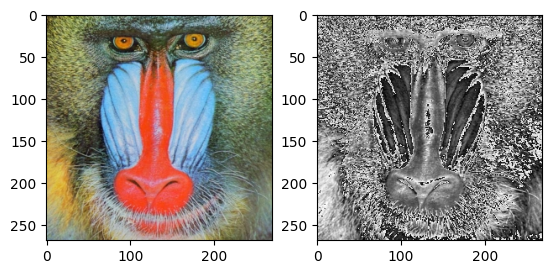

In [35]:
color_img = cv.cvtColor(cv.imread('./drive/MyDrive/PCVK/monyet.jpg'), cv.COLOR_BGR2RGB)
R, G, B, = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
gray_img = (R+G+B)/3

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')

b. Lightness

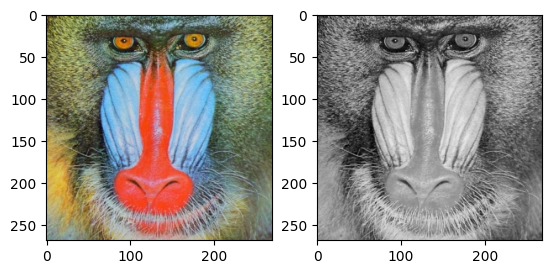

In [36]:
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]
max_channels = np.maximum(np.maximum(R, G), B)
min_channels = np.minimum(np.minimum(R, G), B)

gray_img = max_channels/2 + min_channels/2

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')

3. Luminance

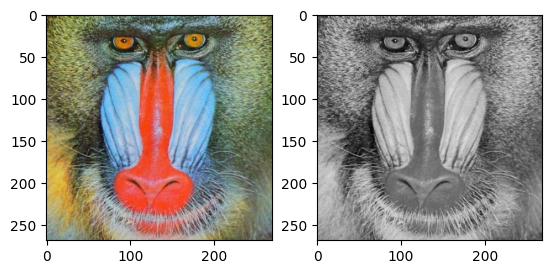

In [37]:
R, G, B = color_img[:,:,0], color_img[:,:,1], color_img[:,:,2]

gray_img = (0.2126 * R) + (0.7152 * G) + (0.0722 * B)

f, axarr = plt.subplots(1,2)
axarr[0].imshow(color_img)
axarr[1].imshow(gray_img,cmap='gray')


5. Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:
     

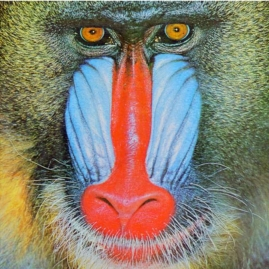

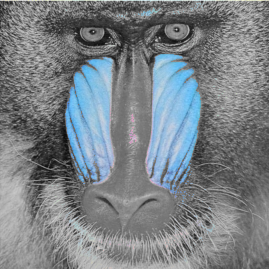

In [57]:
color_img = cv.imread('./drive/MyDrive/PCVK/monyet.jpg')
cv2_imshow(color_img)
ret, mask = cv.threshold(color_img[:,:,0], 180, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(color_img)
mask3[:,:,0] = mask
mask3[:,:,1] = mask
mask3[:,:,2] = mask

red = cv.bitwise_and(color_img, mask3)
gray = cv.cvtColor(color_img, cv.COLOR_BGR2GRAY)
color_img = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(color_img, 255 - mask3)

hasil = gray + red

cv2_imshow(hasil)